In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Utility
import torch

### Load dataset

In [2]:
tf_data = Utility.load_dataset('dataset/','network_02.csv')

## Load KGE model

In [3]:
path, m = 'dataset/', 'TransH' #'TransE', 'DistMult', 'TransH'

In [4]:
model = torch.load(path + m + '/trained_model.pkl') # , map_location='cpu'

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help` for usage information.


/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help` for usage information.




### Obtain the embeddings of entities ans relations

In [5]:
entity_embedding_tensor, relation_embedding_tensor = Utility.get_learned_embeddings(model)
entity_embedding_tensor

tensor([[ 0.0291,  0.0189,  0.0288,  ...,  0.0206, -0.0155,  0.4893],
        [-0.0477,  0.0019, -0.0148,  ...,  0.0265,  0.0192,  0.4547],
        [-0.0016,  0.0148,  0.0147,  ...,  0.0134, -0.0118,  0.4469],
        ...,
        [-0.0088, -0.1195, -0.0121,  ...,  0.0641,  0.0072,  0.0229],
        [ 0.0174, -0.1173, -0.0116,  ...,  0.1363, -0.3436, -0.0134],
        [ 0.0070, -0.0015,  0.0102,  ..., -0.0087,  0.5492,  0.0050]],
       device='cuda:0', grad_fn=<ViewBackward0>)

### Create pandas DataFrame with the embedding entity of type country

In [6]:
tf_dataset = pd.read_csv(path+'worldbank.csv', delimiter=",")
entity = list(tf_dataset.s.unique())
df_predicted_entities, new_df, df_g1 = Utility.create_dataframe_predicted_entities(entity_embedding_tensor, entity, tf_data)
new_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
62240,-0.016373,-0.001546,0.043962,0.300884,-0.021902,-0.047271,0.042290,-0.247590,-0.021075,0.276977,...,-0.148462,0.010692,0.044960,0.164826,-0.033904,0.017615,0.216759,0.109475,0.020936,country:ABW
62241,0.101768,0.122352,0.078788,0.149517,0.168200,0.078350,-0.136522,-0.121220,-0.169187,0.185492,...,0.260749,0.022304,-0.235578,-0.154878,-0.037524,0.127132,0.089268,0.127936,-0.047157,country:AFG
62242,0.112416,0.121334,0.092820,0.159955,0.172087,0.105241,-0.146186,-0.137105,-0.169924,0.194477,...,0.247538,0.027783,-0.251024,-0.147044,-0.031825,0.130942,0.085425,0.134343,-0.103876,country:AGO
62245,0.122101,0.123465,0.065455,0.162487,0.208536,0.090851,-0.131597,-0.129443,-0.173239,0.194861,...,0.193675,-0.002543,-0.238780,-0.118771,-0.024546,0.120196,0.102805,0.128806,-0.125902,country:ALB
62246,0.110351,0.004654,0.007433,0.200640,0.241718,-0.079133,-0.161268,-0.244055,-0.084324,0.292185,...,0.011028,0.036617,-0.036669,-0.041390,-0.041494,0.095483,0.108677,0.068174,-0.023506,country:AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62477,0.116716,0.113409,0.083623,0.148116,0.197476,0.096688,-0.124413,-0.120638,-0.162142,0.178956,...,0.273384,0.028006,-0.210515,-0.117844,-0.018902,0.118898,0.077502,0.126769,-0.094731,country:XKX
62478,0.095605,0.122924,0.068479,0.130443,0.125538,-0.047909,-0.126191,-0.119276,-0.158951,0.167427,...,0.230147,0.022550,-0.060993,-0.177312,0.007705,0.129015,0.055954,0.115469,-0.082947,country:YEM
62479,0.113150,0.116514,0.068252,0.162266,0.180275,0.268736,-0.140450,-0.142623,-0.162045,0.220094,...,0.059030,0.019768,-0.125439,-0.146230,0.049405,0.112845,0.077610,0.120492,-0.248652,country:ZAF
62480,0.102554,0.135546,0.065764,0.128908,0.189525,0.043245,-0.104973,-0.097535,-0.159836,0.161751,...,0.236764,0.002727,-0.230650,-0.093997,-0.002837,0.105071,0.054426,0.120034,-0.022750,country:ZMB


## Create similarity matrix of country

In [7]:
sim_matrix, threshold, list_sim = Utility.matrix_similarity(new_df, Utility.cosine_sim, 60)
Utility.SemEP_structure('../semep-solver-master/datasets/KGE_Country/'+m+'/matrix_country.tsv', sim_matrix, sep=' ')
sim_matrix

percentil 0.72405


,country:ABW,country:AFG,country:AGO,country:ALB,country:AND,country:ARE,country:ARG,country:ARM,country:ASM,country:ATG,...,country:VGB,country:VIR,country:VNM,country:VUT,country:WSM,country:XKX,country:YEM,country:ZAF,country:ZMB,country:ZWE
country:ABW,1.00000,0.40585,0.43278,0.44388,0.69261,0.65587,0.42321,0.41587,0.57610,0.65139,...,0.49235,0.69079,0.51340,0.67528,0.54621,0.41848,0.36327,0.48013,0.40605,0.44778
country:AFG,0.40585,1.00000,0.98963,0.98196,0.69224,0.52710,0.98190,0.98429,0.67383,0.55050,...,0.19549,0.25958,0.82572,0.35411,0.31597,0.98465,0.89900,0.88453,0.95965,0.97104
country:AGO,0.43278,0.98963,1.00000,0.98963,0.71363,0.57273,0.98505,0.98763,0.70950,0.56865,...,0.19134,0.26367,0.85713,0.36170,0.32499,0.98587,0.88747,0.92245,0.97095,0.98185
country:ALB,0.44388,0.98196,0.98963,1.00000,0.74145,0.60221,0.99154,0.99378,0.72685,0.57860,...,0.17700,0.27346,0.88438,0.35516,0.31552,0.98786,0.87628,0.92441,0.97492,0.99073
country:AND,0.69261,0.69224,0.71363,0.74145,1.00000,0.82960,0.70932,0.72318,0.80047,0.60477,...,0.30590,0.48610,0.81694,0.56925,0.52662,0.71107,0.62166,0.72330,0.72498,0.74861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country:XKX,0.41848,0.98465,0.98587,0.98786,0.71107,0.57508,0.98566,0.99154,0.71510,0.55863,...,0.17721,0.24763,0.86125,0.35531,0.32140,1.00000,0.89746,0.90538,0.97307,0.98142
country:YEM,0.36327,0.89900,0.88747,0.87628,0.62166,0.47373,0.88954,0.88021,0.57516,0.55808,...,0.20858,0.26030,0.70418,0.33015,0.30697,0.89746,1.00000,0.81788,0.84721,0.84716
country:ZAF,0.48013,0.88453,0.92245,0.92441,0.72330,0.62900,0.92963,0.89761,0.66958,0.61827,...,0.21345,0.26782,0.80933,0.34791,0.33762,0.90538,0.81788,1.00000,0.88015,0.90124
country:ZMB,0.40605,0.95965,0.97095,0.97492,0.72498,0.60886,0.95398,0.97643,0.78205,0.54926,...,0.17334,0.26629,0.90198,0.30339,0.31897,0.97307,0.84721,0.88015,1.00000,0.97892


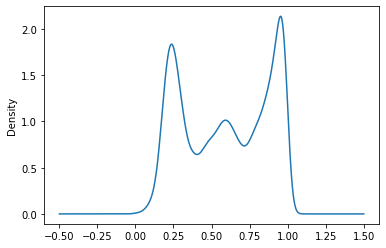

In [8]:
standard_similarity = pd.DataFrame()
standard_similarity.insert(0, 'similarity', list_sim)
ax = standard_similarity["similarity"].plot.kde(bw_method=0.1)
# fig = ax.get_figure()
# fig.savefig("Density_plot.pdf", format='pdf', bbox_inches = 'tight')

## Create similarity matrix of categorical values of indicators

In [9]:
labels=['low', 'mediumLow', 'medium', 'mediumHigh', 'high']
val = [0,1,2,3,4]
sim_matrix_cat = pd.DataFrame(index=val, columns=val)
list_sim = []
gab = 0.25

for index in val:
    i = 1
    for indexC in range(index, len(val)):
        sim_matrix_cat.at[index, indexC] = i
        sim_matrix_cat.at[indexC, index] = i
        if index!=indexC:
            list_sim.append(i)
        i-=gab

threshold = np.percentile(list_sim, 30)
print("percentil", threshold)
sim_matrix_cat.index = labels
sim_matrix_cat.columns = labels
Utility.SemEP_structure('../semep-solver-master/datasets/KGE_Country/'+m+'/matrix_category.tsv', sim_matrix_cat, sep=' ')
sim_matrix_cat

percentil 0.42499999999999993


,low,mediumLow,medium,mediumHigh,high
low,1,0.75,0.5,0.25,0.0
mediumLow,0.75,1,0.75,0.5,0.25
medium,0.5,0.75,1,0.75,0.5
mediumHigh,0.25,0.5,0.75,1,0.75
high,0.0,0.25,0.5,0.75,1


## Save the files to execute SemEP

In [10]:
Utility.create_entitie(sim_matrix.columns.to_list(), '../semep-solver-master/datasets/KGE_Country/'+m+'/country.txt')
Utility.create_entitie(sim_matrix_cat.columns.to_list(), '../semep-solver-master/datasets/KGE_Country/'+m+'/category.txt')

In [11]:
tf_dataset.head(2)

,s,p,o
0,country:COM,low,Gross national expenditure (current US$)
1,country:SYC,low,Gross national expenditure (current US$)


In [12]:
tf_dataset['cost'] = 1.0
# tf_dataset = tf_dataset[['country', 'category_indicator', 'indicator', 'cost']]
Utility.SemEP_structure('../semep-solver-master/datasets/KGE_Country/'+m+'/graph_country_category.tsv', tf_dataset, sep='\t')

./semEP -n 2 datasets/KGE_Country/TransE/country.txt datasets/KGE_Country/TransE/matrix_country.tsv 0.03 datasets/KGE_Country/TransE/category.txt datasets/KGE_Country/TransE/matrix_category.tsv 0.2 datasets/KGE_Country/TransE/graph_country_category.tsv